In [1]:
import csv
import numpy as np 
import netCDF4 as nc 
import os 
from sklearn import metrics 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split 


In [53]:
def load_GEFS_data(directory,files_to_use,file_sub_str):
    for i,f in enumerate(files_to_use):
        if i == 0:
            X = load_GEFS_file(directory,files_to_use[i],file_sub_str)
        else:
            X_new = load_GEFS_file(directory,files_to_use[i],file_sub_str)
            X = np.hstack((X,X_new))
    return X

In [54]:
def load_GEFS_file(directory,data_type,file_sub_str):
    print('loading',data_type)
    path = os.path.join(directory,data_type+file_sub_str)
    X = list(nc.Dataset(path,'r+').variables.values())[-1][:,:,:,3:7,3:13] 
    X = np.mean(X,axis=1) 
    X = X.reshape(X.shape[0],np.prod(X.shape[1:])) 
    return X

In [55]:
X=load_GEFS_data(r"C:\Users\Aman\Documents\data\solar_energy_predict\train",["apcp_sfc","dlwrf_sfc","dswrf_sfc","pres_msl","pwat_eatm","spfh_2m","tcdc_eatm",
                                   "tcolc_eatm","tmax_2m","tmin_2m","tmp_2m","tmp_sfc","ulwrf_sfc","ulwrf_tatm","uswrf_sfc"],
               "_latlon_subset_19940101_20071231.nc")

loading apcp_sfc
loading dlwrf_sfc
loading dswrf_sfc
loading pres_msl
loading pwat_eatm
loading spfh_2m
loading tcdc_eatm
loading tcolc_eatm
loading tmax_2m
loading tmin_2m
loading tmp_2m
loading tmp_sfc
loading ulwrf_sfc
loading ulwrf_tatm
loading uswrf_sfc


In [56]:
import numpy
numpy.savetxt("Xdata.csv", X, delimiter=",")


In [57]:
from numpy import genfromtxt
X = genfromtxt('Xdata.csv', delimiter=',')

In [58]:
X.shape



(5113, 3000)

In [59]:
Xt=load_GEFS_data(r"C:\Users\Aman\Documents\data\solar_energy_predict\test",["apcp_sfc","dlwrf_sfc","dswrf_sfc","pres_msl","pwat_eatm","spfh_2m","tcdc_eatm",
                                   "tcolc_eatm","tmax_2m","tmin_2m","tmp_2m","tmp_sfc","ulwrf_sfc","ulwrf_tatm","uswrf_sfc"],
               "_latlon_subset_20080101_20121130.nc")

loading apcp_sfc
loading dlwrf_sfc
loading dswrf_sfc
loading pres_msl
loading pwat_eatm
loading spfh_2m
loading tcdc_eatm
loading tcolc_eatm
loading tmax_2m
loading tmin_2m
loading tmp_2m
loading tmp_sfc
loading ulwrf_sfc
loading ulwrf_tatm
loading uswrf_sfc


In [62]:
def load_csv_data(path):
    data = np.loadtxt(path,delimiter=',',dtype=float,skiprows=1)
    times = data[:,0].astype(int)
    Y = data[:,1:]
    return times,Y

In [65]:
times,y=load_csv_data("train.csv")

In [64]:
cd C:\Users\Aman\Documents\data\solar_energy_predict

C:\Users\Aman\Documents\data\solar_energy_predict


In [ ]:
y.shape

In [66]:
timest,yt=load_csv_data("sampleSubmission.csv")


In [67]:
yt.shape 

(1796, 98)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 45)


In [69]:
 def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_scores = -train_scores
    test_scores = -test_scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Training data')
    plt.ylabel(r'MAE')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()

Ridge regression

In [70]:
rdg_train = Ridge(normalize=True,alpha=0.31)
rdg_train.fit(X_train, y_train)
preds = rdg_train.predict(X_test)
mae1 = metrics.mean_absolute_error(y_test,preds)
mae1

2220281.250306921

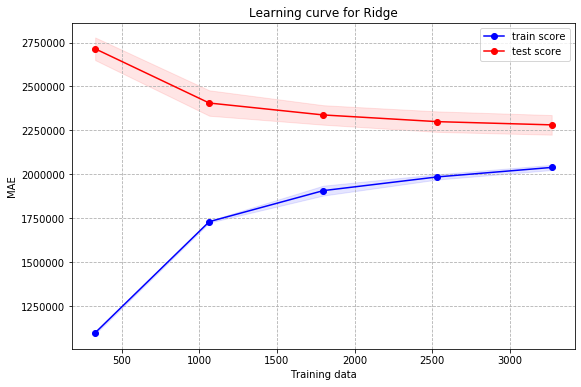

In [73]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
train_sizes, train_scores, test_scores = learning_curve(rdg_train, X= X_train, y = y_train, 
                                            cv= 5,  scoring='neg_mean_absolute_error')

fig_rdg=plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for Ridge')

Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
lr_train = LinearRegression()
lr_train.fit(X_train, y_train)
preds = lr_train.predict(X_test)
mae2 = metrics.mean_absolute_error(y_test,preds)
mae2

4820050.111314773

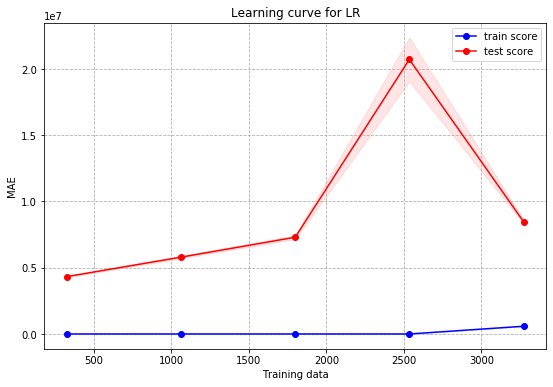

In [74]:
plt.figure(figsize=(9,6))
train_sizes, train_scores, test_scores = learning_curve(lr_train, X= X_train, y = y_train, 
                                            cv= 5,  scoring='neg_mean_absolute_error')

fig_lr=plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for LR')

In [77]:
X.shape


(5113, 3000)

In [78]:
X_train.shape

(4090, 3000)

Decision Tree

In [79]:
from sklearn.tree import DecisionTreeRegressor
regressor_train = DecisionTreeRegressor(max_depth=7)
regressor_train.fit(X_train, y_train)
predsx = regressor_train.predict(X_test)
mae3 = metrics.mean_absolute_error(y_test,preds)
mae3


4820050.111314773

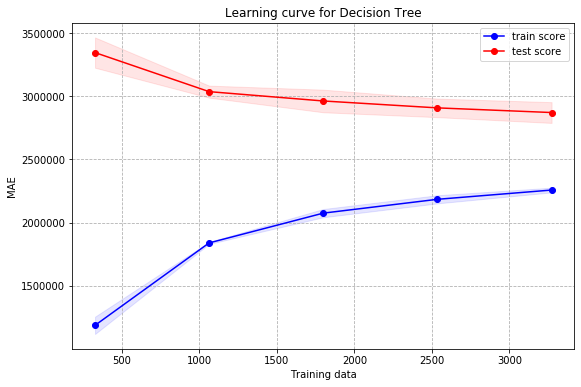

In [80]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
train_sizes, train_scores, test_scores = learning_curve(regressor_train, X= X_train, y = y_train, 
                                            cv= 5,  scoring='neg_mean_absolute_error')

fig_dt=plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for Decision Tree')

Lasso Regression

In [81]:
from sklearn import linear_model
lso_train = linear_model.Lasso(alpha=0.3,normalize=True)
lso_train.fit(X_train, y_train )
preds = lso_train.predict(X_test)
mae4 = metrics.mean_absolute_error(y_test,preds)
mae4

C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9002443701298300.0, tolerance: 25296594984169.0
  positive)
C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9427666971670476.0, tolerance: 25538317760068.344
  positive)
C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2008761011949086e+16, tolerance: 24306869393545.86
  positive)
C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.179680696998206e+16, tolerance: 25484700603829.605
  positive)
C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4057060328717544e+16, tolerance: 25295295447315.844
  positive)
C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1154689010037924e+16, tolerance: 26650462597055.414
  positive)
C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0722839126271934e+16, tolerance: 26441574766779.875
  positive)
C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9165546651020812.0, tolerance: 25513268037677.168
  positive)
C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0375673183162282e+16, tolerance: 25774050047186.992
  positive)
C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.473093945330822e+16, tolerance: 26148002696901.996
  positive)
C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.097591010788458e+16, tolerance: 25679353085714.613
  positive)
C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9949991713313040.0, tolerance: 25491235093177.812
  positive)
C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

2910628.7779700425

In [ ]:
plt.figure(figsize=(9,6))
train_sizes, train_scores, test_scores = learning_curve(lso_train, X= X_train, y = y_train, 
                                            cv= 5,  scoring='neg_mean_absolute_error')

fig_lso=plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for Lasso')

Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
RFR_train=MultiOutputRegressor(RandomForestRegressor(max_depth=6,n_estimators=50))
RFR_train.fit(X_train, y_train)
y_pred = RFR_train.predict(X_test)
mae6 = metrics.mean_absolute_error(y_test,y_pred)
mae6

In [ ]:
plt.figure(figsize=(9,6))
train_sizes, train_scores, test_scores = learning_curve(RFR_train, X= X_train, y = y_train, 
                                            cv= 5,  scoring='neg_mean_absolute_error')

fig_dt=plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for Random Forest')

ANN(Sequential)

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
model_train = Sequential()
model_train.add(Dense(300, activation='relu', input_shape = (3000,)))
model_train.add(Dense(250, activation='relu'))
model_train.add(Dense(200, activation='relu'))
model_train.add(Dense(150, activation='relu'))

model_train.add(Dense(98, kernel_initializer='normal'))


In [ ]:
model_train.compile(optimizer='adam', loss='mean_absolute_error')


In [ ]:
history=model_train.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=1000)


In [ ]:
mae5 = model_train.evaluate(X_test, y_test)
mae5

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'], '.-',color='blue')
plt.plot(history.history['val_loss'], '.-',color='red')
plt.title('Learning curve for ANN')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train score', 'test score'])
plt.grid(ls='--')
plt.show()

In [84]:
import pandas as pd 
d = {'Ridge': [mae1], 'Linear Regression': [mae2], 'Decision Tree': [mae3],'Lasso': [mae4],
    'Random Forest':[mae6]}
df = pd.DataFrame(data=d)
df.index=["MAE"]
df


,Ridge,Linear Regression,Decision Tree,Lasso,Random Forest
MAE,2.220281e+06,4.820050e+06,4.820050e+06,2.910629e+06,2.217006e+06


C:\Users\Aman\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1, "Models' MAEs")

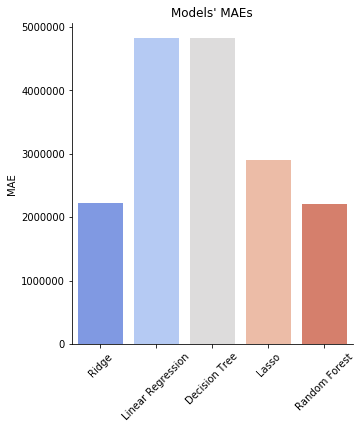

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.factorplot(data=df,kind="bar",palette='coolwarm')
plt.xticks(rotation=45)
plt.ylabel("MAE")
plt.title("Models' MAEs")

In [1]:
cd

C:\Users\Aman
